In [1]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [2]:
!pip install tensorflow

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy import stats
from keras import optimizers
print(tf.__version__)

2022-09-04 12:34:29.257041: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-04 12:34:29.257075: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1


In [4]:
train = pd.read_csv("realtor-data.csv")
train

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
813154,for_sale,1600000.0,2.0,2.0,NaN,"235 E 87th St Apt 5C, Manhattan, NY, 10128",235 E 87th St Apt 5C,Manhattan,New York,10128.0,NaN,2019-01-09
813155,for_sale,699000.0,4.0,2.0,0.04,"107 77th St, North Bergen, NJ, 07047",107 77th St,North Bergen,New Jersey,7047.0,NaN,2006-08-09
813156,for_sale,480000.0,2.0,1.0,NaN,"67-76 Booth St Unit 8O, Forest Hills, NY, 11375",67-76 Booth St Unit 8O,Forest Hills,New York,11375.0,1250.0,2014-08-06
813157,for_sale,450000.0,1.0,1.0,NaN,"34-41 85 St Unit 1J, Jackson Heights, NY, 11372",34-41 85 St Unit 1J,Jackson Heights,New York,11372.0,827.0,2020-02-04


In [5]:
pd.set_option("display.max_rows", 100)

In [6]:
train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
813154     True
813155     True
813156     True
813157     True
813158     True
Length: 813159, dtype: bool

In [7]:
train.drop_duplicates(subset=None, keep="first", inplace=True)
train

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
812927,for_sale,635000.0,5.0,2.0,0.04,"427 Olmstead Ave, Bronx, NY, 10473",427 Olmstead Ave,Bronx,New York,10473.0,1944.0,2008-02-20
812959,for_sale,2249000.0,3.0,3.0,NaN,"462 Warren St Apt 1, Brooklyn, NY, 11217",462 Warren St Apt 1,Brooklyn,New York,11217.0,NaN,2016-06-03
812995,for_sale,1750000.0,8.0,6.0,0.05,"342 89th St, New York City, NY, 11209",342 89th St,New York City,New York,11209.0,5100.0,NaN
813028,for_sale,629000.0,2.0,1.0,NaN,"501 W 123rd St Apt Mc, New York, NY, 10027",501 W 123rd St Apt Mc,New York,New York,10027.0,NaN,2005-05-13


In [8]:
train.isnull().mean()*100

status           0.000000
price            0.016439
bed             15.473483
bath            14.469803
acre_lot        27.234536
full_address     0.000000
street           0.451154
city             0.020092
state            0.000000
zip_code         0.029225
house_size      32.103163
sold_date       47.878024
dtype: float64

In [9]:
train = train.dropna(subset = ["price","bed","bath","acre_lot","city","zip_code","house_size"])
train = train.drop(["sold_date","full_address","status","street"], axis=1)
train.isnull().mean()*100

price         0.0
bed           0.0
bath          0.0
acre_lot      0.0
city          0.0
state         0.0
zip_code      0.0
house_size    0.0
dtype: float64

In [10]:
train

,price,bed,bath,acre_lot,city,state,zip_code,house_size
0,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0
1,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0
2,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0
3,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0
5,179000.0,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0
...,...,...,...,...,...,...,...,...
812489,699900.0,3.0,2.0,0.38,Staten Island,New York,10301.0,1062.0
812513,599000.0,3.0,3.0,0.04,Bronx,New York,10466.0,1644.0
812772,170000.0,2.0,1.0,3.05,Mount Vernon,New York,10552.0,900.0
812927,635000.0,5.0,2.0,0.04,Bronx,New York,10473.0,1944.0


In [11]:
train.nunique().sort_values()

state           14
bath            36
bed             37
acre_lot      1763
city          2199
zip_code      2915
price         4343
house_size    5887
dtype: int64

In [12]:
train = train.astype({'bed' : 'category' ,
                      'bath' : 'category',
                      'city' : 'category',
                      'state' : 'category',
                      'zip_code' : 'category'})
cat_columns = train.select_dtypes(['category']).columns
train[cat_columns] = train[cat_columns].apply(lambda x: x.cat.codes)
train.dtypes.sort_values()

bed              int8
bath             int8
state            int8
city            int16
zip_code        int16
price         float64
acre_lot      float64
house_size    float64
dtype: object

In [13]:
train

,price,bed,bath,acre_lot,city,state,zip_code,house_size
0,105000.0,2,1,0.12,11,8,0,920.0
1,80000.0,3,1,0.08,11,8,0,1527.0
2,67000.0,1,0,0.15,914,8,87,748.0
3,145000.0,3,1,0.10,1512,8,60,1800.0
5,179000.0,3,2,0.46,1672,8,6,2520.0
...,...,...,...,...,...,...,...,...
812489,699900.0,2,1,0.38,1822,6,2340,1062.0
812513,599000.0,2,2,0.04,234,6,2367,1644.0
812772,170000.0,1,0,3.05,1229,6,2393,900.0
812927,635000.0,4,1,0.04,234,6,2374,1944.0


c_n_housing = train.columns.values.tolist()
unwanted_num=["price","bath","bed","city","state","zip_code"]
c_n_housing = [ele for ele in c_n_housing if ele not in unwanted_num]
print(c_n_housing)
corrp = []
for i in c_n_housing: 
    putt = train[i].corr(train['price'])
    
    if putt >= 0.5 or putt <-0.5:
        corrp = corrp + [i]
    else:
        continue
    print("The correlation between ", i ," and Price is = ", putt)
print(corrp)

for i in corrp:  # Loop over all columns except 'Location'
    sns.set()
    fig, ax = plt.subplots()
    fig.set_size_inches(30.5, 10.5)
    sns.regplot(x=i, y='price', data=train)  # column is chosen here

['acre_lot', 'house_size']
The correlation between  acre_lot  and Price is =  -0.0006821438922361882
The correlation between  house_size  and Price is =  0.1327455741422826
['acre_lot', 'house_size']


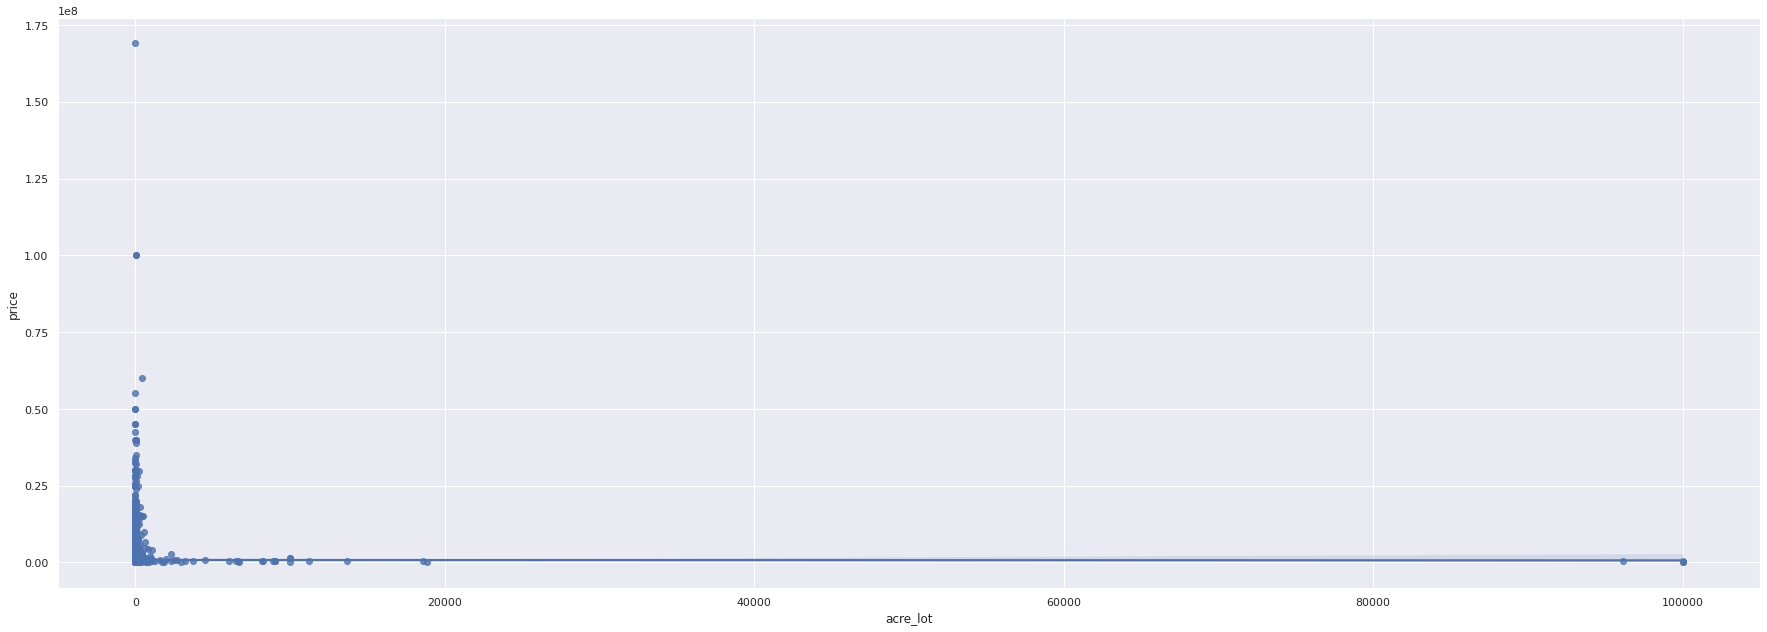

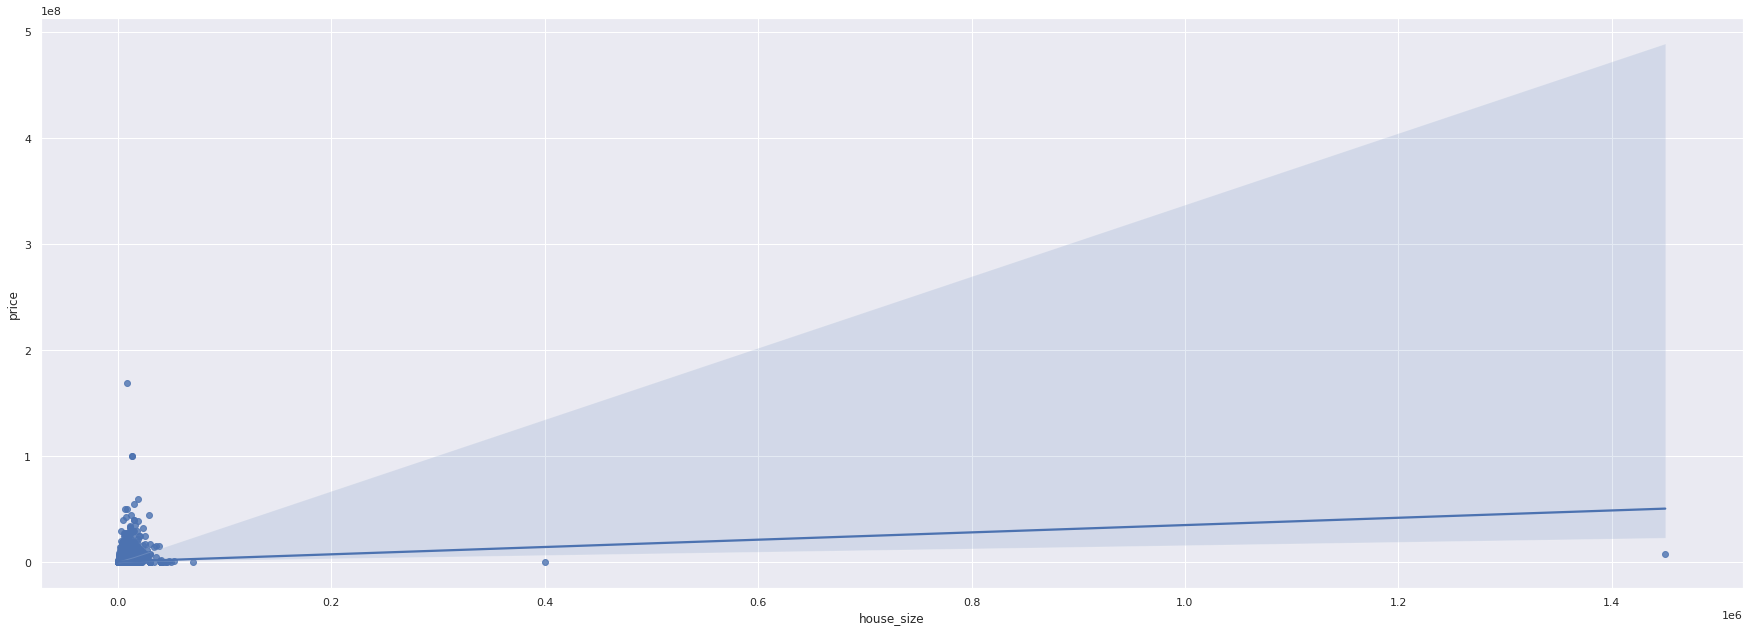

In [14]:
c_n_housing = train.columns.values.tolist()
unwanted_num=["price","bath","bed","city","state","zip_code"]
c_n_housing = [ele for ele in c_n_housing if ele not in unwanted_num]
print(c_n_housing)
corrp = []
for i in c_n_housing: 
    putt = train[i].corr(train['price'])
    
    if 1==1:
        corrp = corrp + [i]
    else:
        continue
    print("The correlation between ", i ," and Price is = ", putt)
print(corrp)

for i in corrp:  # Loop over all columns except 'Location'
    sns.set()
    fig, ax = plt.subplots()
    fig.set_size_inches(30.5, 10.5)
    sns.regplot(x=i, y='price', data=train)  # column is chosen here

In [15]:
pearson_housing = ["bed","bath","city","state","zip_code"]
pcarl = []
for i in pearson_housing: 
   pearson_coef, p_value = stats.pearsonr(train[i],train['price'])
   if p_value <= 0.001:
        pcarl = pcarl + [i]
   else:
        continue
   print("The P-value of " ,i ," is P =", p_value) 

print(pcarl)

The P-value of  bed  is P = 0.0
The P-value of  bath  is P = 0.0
The P-value of  city  is P = 0.00014890086224794773
The P-value of  state  is P = 0.00017577641356703798
The P-value of  zip_code  is P = 1.886743952198424e-11
['bed', 'bath', 'city', 'state', 'zip_code']


In [16]:
train = train[["price","bed","bath","city","state","zip_code"]]
train_dataset = train.sample(frac=0.7, random_state=0)
test_dataset = train.drop(train_dataset.index)

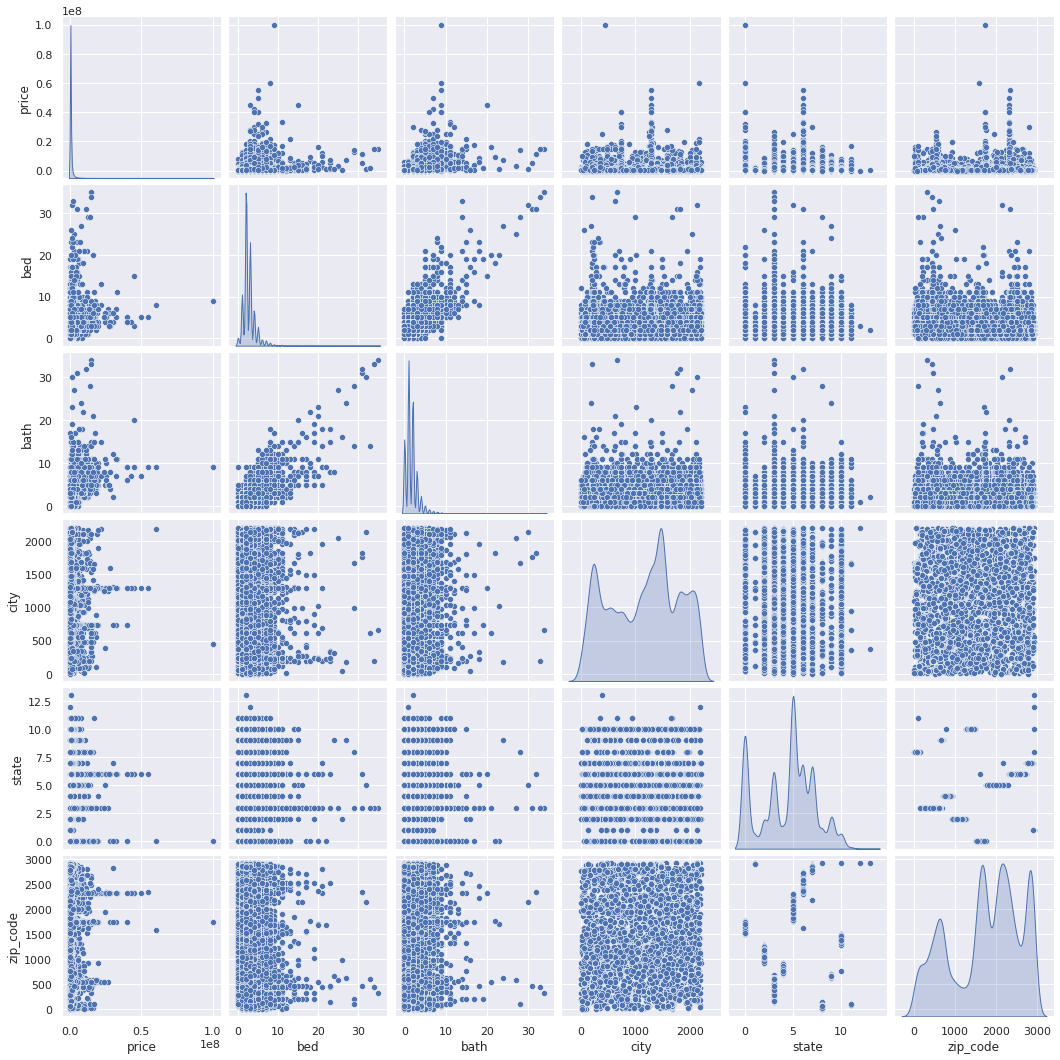

In [17]:
sns.pairplot(train_dataset, diag_kind='kde')

In [18]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [19]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,36074.0,767825.189610,1.621459e+06,500.0,270000.0,429900.0,742326.25,100000000.0
bed,36074.0,2.694018,1.688905e+00,0.0,2.0,2.0,3.00,35.0
bath,36074.0,1.672562,1.567437e+00,0.0,1.0,1.0,2.00,34.0
city,36074.0,1150.344985,6.294447e+02,1.0,574.0,1261.0,1659.00,2198.0
state,36074.0,4.417198,2.786338e+00,0.0,3.0,5.0,6.00,13.0
zip_code,36074.0,1726.376726,8.376771e+02,0.0,999.0,1841.0,2350.00,2914.0


In [20]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
price,767825.189610,1.621459e+06
bed,2.694018,1.688905e+00
bath,1.672562,1.567437e+00
city,1150.344985,6.294447e+02
state,4.417198,2.786338e+00
zip_code,1726.376726,8.376771e+02


In [21]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [22]:
normalizer.adapt(np.array(train_features))

2022-09-04 12:34:48.996000: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-04 12:34:48.996038: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-04 12:34:48.996067: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-09-04 12:34:48.996353: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
print(normalizer.mean.numpy())

[[   2.694    1.673 1150.345    4.417 1726.375]]


In [24]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   3    2 1688    2  960]]

Normalized: [[ 0.18  0.21  0.85 -0.87 -0.91]]


In [25]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [26]:
def build_and_compile_model(norm):
  model = keras.Sequential([norm,layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(2048, activation='relu'),
                            layers.Dense(1)])

  model.compile(loss='mean_absolute_percentage_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
  return model

In [27]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense (Dense)               (None, 2048)              12288     
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_3 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_4 (Dense)             (None, 2048)              4196352   
                                                        

In [ ]:
%%time
history = dnn_model.fit(train_features, train_labels, validation_split=0.2, verbose=1, epochs=100)

Epoch 1/100
 82/902 [=>............................] - ETA: 3:36 - loss: 1754.3818

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=1)

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model')

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(test_features, test_labels, verbose=1)